# Importing Libraries

In [1]:
# Import core libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# For deployment preparation
import pickle


In [2]:
data = pd.read_excel(r"C:\Users\Maaz shaikh\OneDrive\Desktop\Email Marketing Campaign\Email_Marketing_Campaign_Dataset_Rounded.xlsx")

data.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,0,1,1
1,33,6,1,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,1778.3,2.3,40,66.8,0,0,1


# Exploratory Data Analysis

In [3]:
#Information of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   Purchase_History           1000 non-null   float64
 4   Time_Spent_On_Website      1000 non-null   float64
 5   Days_Since_Last_Open       1000 non-null   int64  
 6   Customer_Engagement_Score  1000 non-null   float64
 7   Opened_Previous_Emails     1000 non-null   int64  
 8   Clicked_Previous_Emails    1000 non-null   int64  
 9   Device_Type                1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.3 KB


In [4]:
#Description statistics of data
data.describe()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.674000,4.654000,1.515000,1490.63990,4.901600,28.950000,69.578100,0.513000,0.518000,0.517000
std,9.797741,2.008561,0.966804,513.56673,1.985719,14.797448,15.375871,0.500081,0.499926,0.499961
min,2.000000,0.000000,0.000000,35.30000,-1.400000,0.000000,29.300000,0.000000,0.000000,0.000000
25%,28.000000,3.000000,1.000000,1131.27500,3.600000,19.000000,58.700000,0.000000,0.000000,0.000000
50%,35.000000,5.000000,1.500000,1500.05000,5.000000,29.000000,69.150000,1.000000,1.000000,1.000000
75%,41.000000,6.000000,2.000000,1833.47500,6.300000,39.000000,80.500000,1.000000,1.000000,1.000000
max,73.000000,11.000000,5.000000,3121.50000,11.200000,76.000000,122.900000,1.000000,1.000000,1.000000


In [5]:
# Check for missing values
print("Missing Values:")
data.isnull().sum()

# No Missing Values

Missing Values:


Customer_Age                 0
Emails_Opened                0
Emails_Clicked               0
Purchase_History             0
Time_Spent_On_Website        0
Days_Since_Last_Open         0
Customer_Engagement_Score    0
Opened_Previous_Emails       0
Clicked_Previous_Emails      0
Device_Type                  0
dtype: int64

# Data Visualization

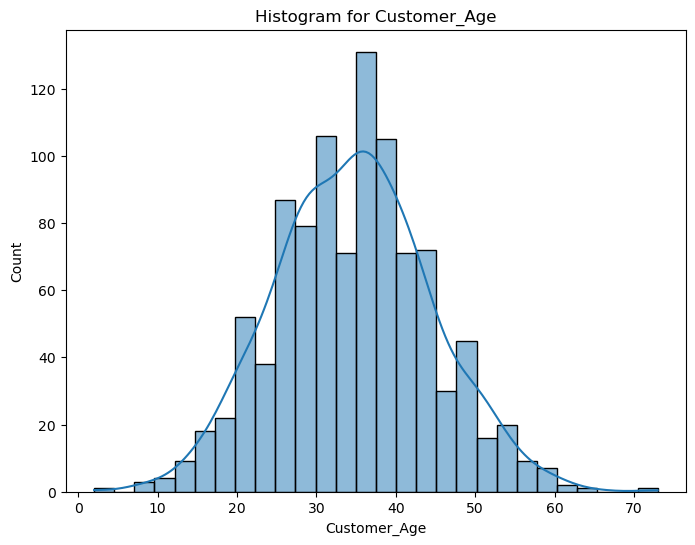

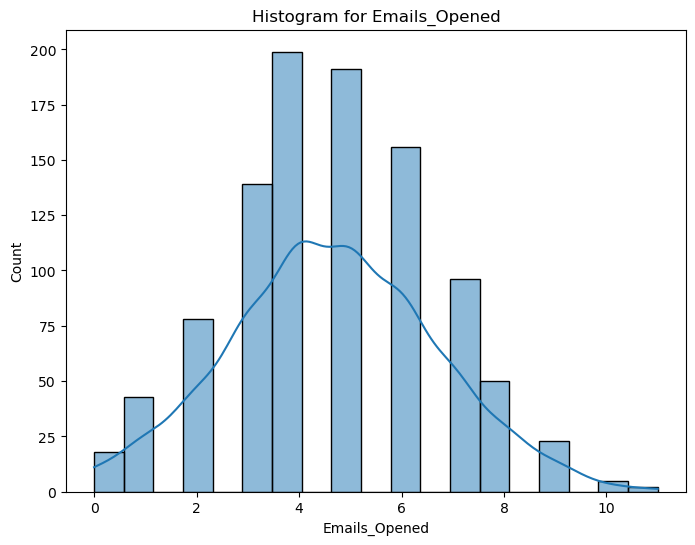

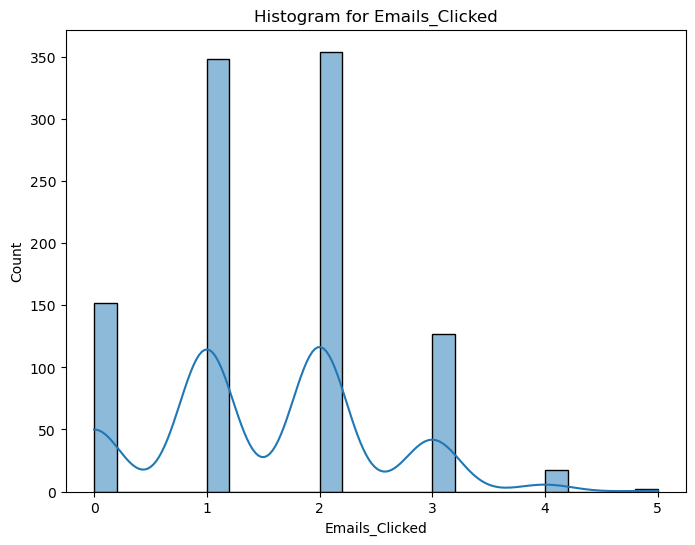

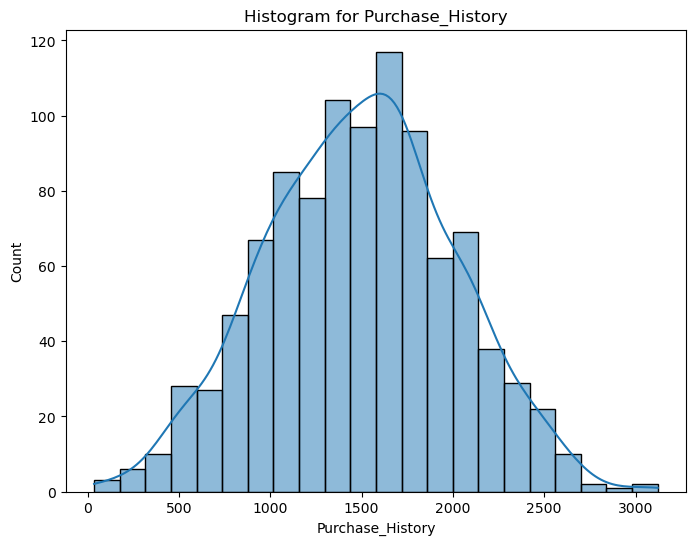

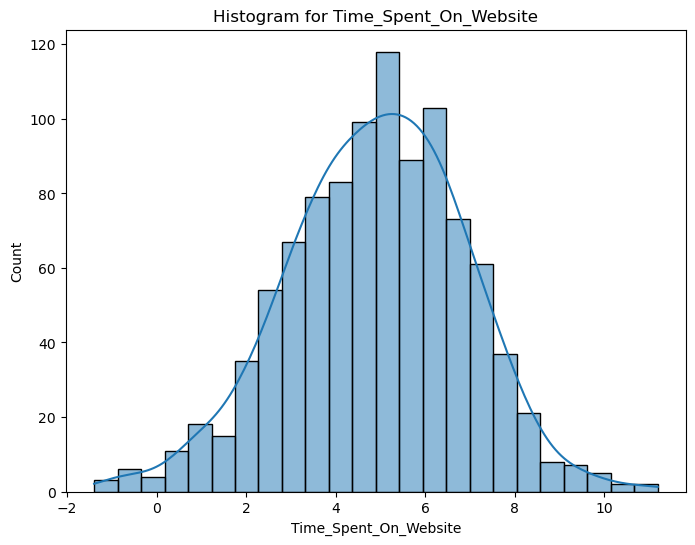

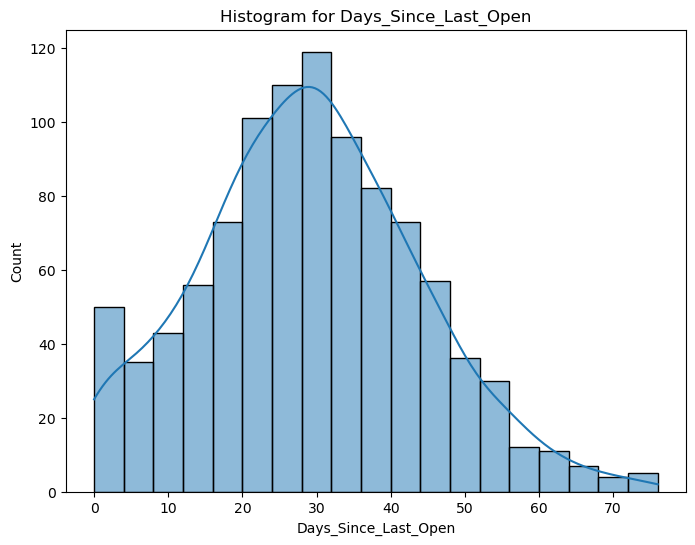

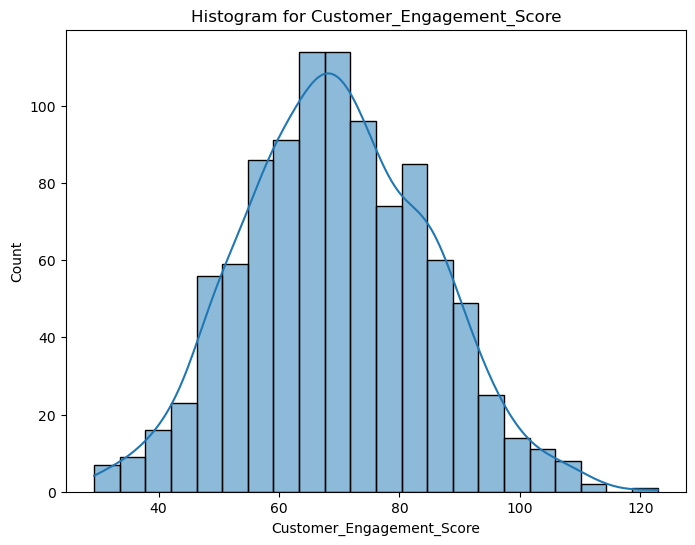

In [6]:
# Plotting Histogram for numerical variables
Numerical_Variables = ["Customer_Age", "Emails_Opened", "Emails_Clicked", "Purchase_History", "Time_Spent_On_Website",
                       "Days_Since_Last_Open", "Customer_Engagement_Score"]

for columns in Numerical_Variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data[columns], kde=True)
    plt.title(f"Histogram for {columns}")
    plt.show()

C:\Users\Maaz shaikh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1200 with 0 Axes>

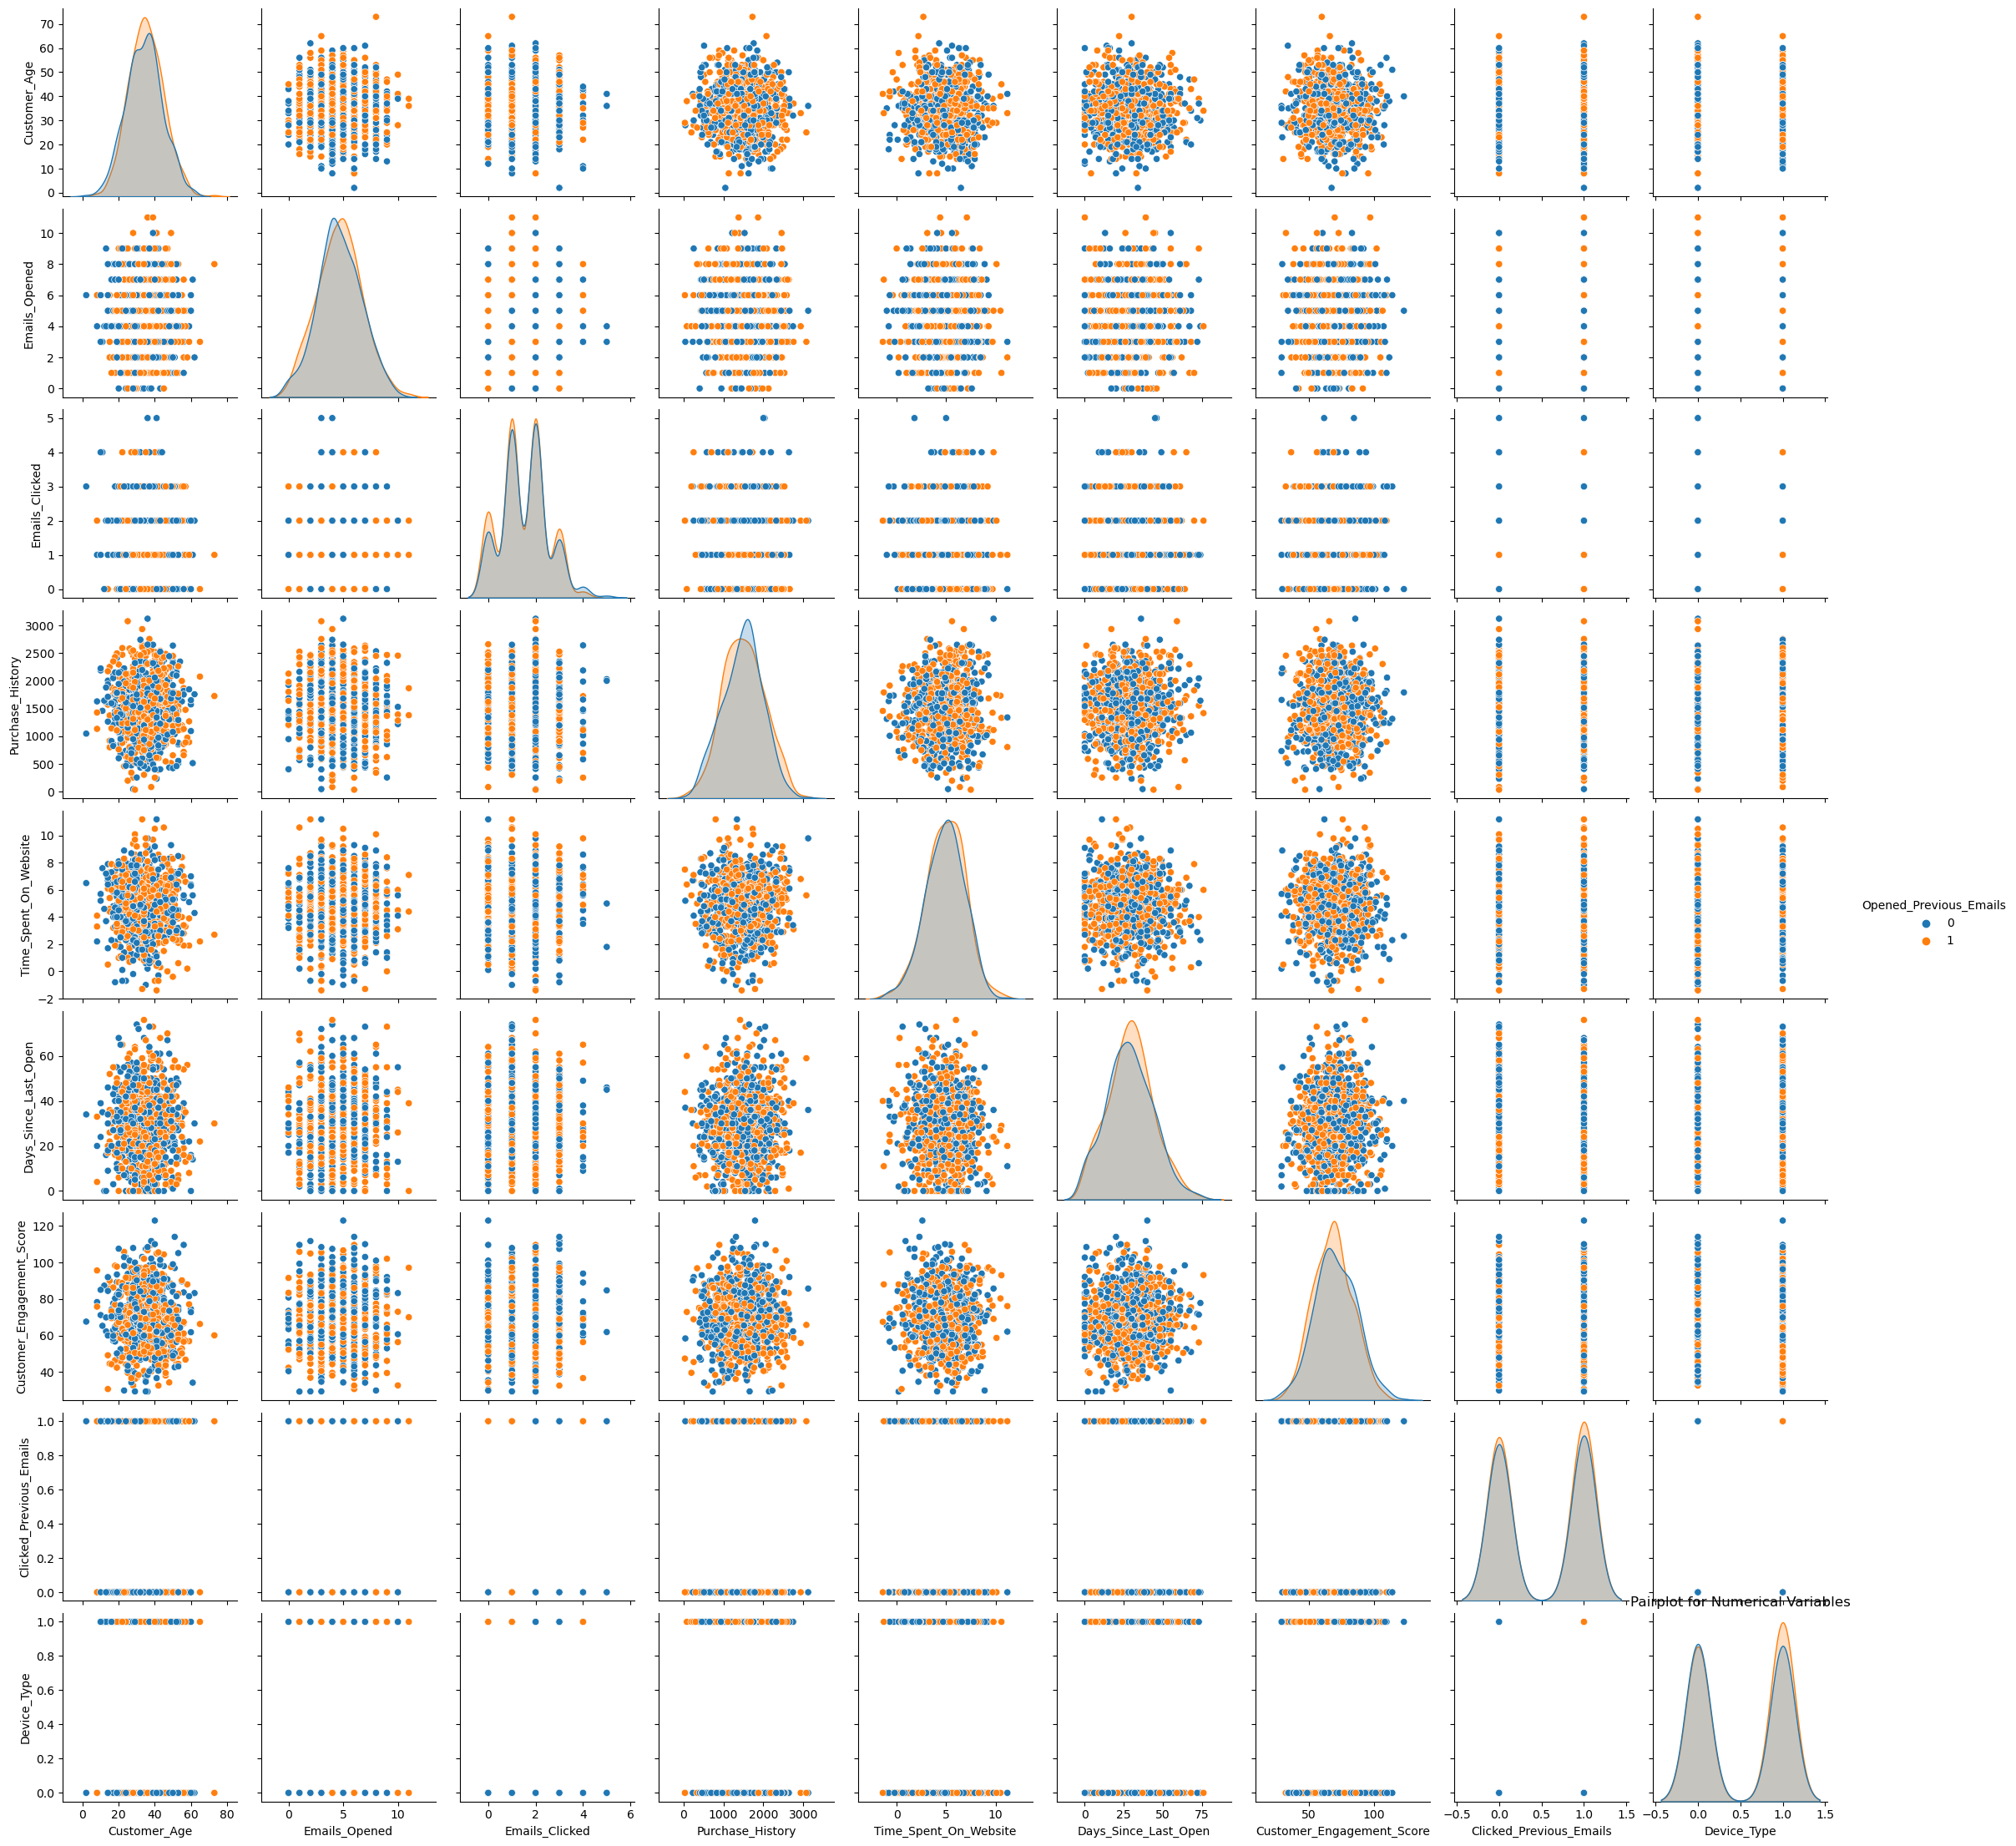

In [7]:
# Plotting Pairplot for Numerical Variables
plt.figure(figsize=(15, 12))
sns.pairplot(data, hue="Opened_Previous_Emails")
plt.title("Pairplot for Numerical Variables")
plt.show()

In [8]:
# Correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
Customer_Age,1.000000,-0.038190,0.022708,-0.013905,-0.031188,-0.006064,-0.032655,0.053371,-0.018828,-0.047298
Emails_Opened,-0.038190,1.000000,-0.002995,-0.050417,-0.011481,0.034848,-0.007859,-0.001497,0.000227,-0.014073
Emails_Clicked,0.022708,-0.002995,1.000000,0.009365,0.028248,-0.000367,-0.029913,-0.037671,0.033613,-0.044017
Purchase_History,-0.013905,-0.050417,0.009365,1.000000,0.019669,0.032327,0.011469,0.037290,-0.035634,0.010106
Time_Spent_On_Website,-0.031188,-0.011481,0.028248,0.019669,1.000000,-0.045040,0.003298,0.014898,0.021550,0.019432
Days_Since_Last_Open,-0.006064,0.034848,-0.000367,0.032327,-0.045040,1.000000,0.014786,0.022678,-0.033436,-0.021128
Customer_Engagement_Score,-0.032655,-0.007859,-0.029913,0.011469,0.003298,0.014786,1.000000,-0.071167,-0.036639,-0.060078
Opened_Previous_Emails,0.053371,-0.001497,-0.037671,0.037290,0.014898,0.022678,-0.071167,1.000000,0.009073,0.039152
Clicked_Previous_Emails,-0.018828,0.000227,0.033613,-0.035634,0.021550,-0.033436,-0.036639,0.009073,1.000000,-0.039272
Device_Type,-0.047298,-0.014073,-0.044017,0.010106,0.019432,-0.021128,-0.060078,0.039152,-0.039272,1.000000


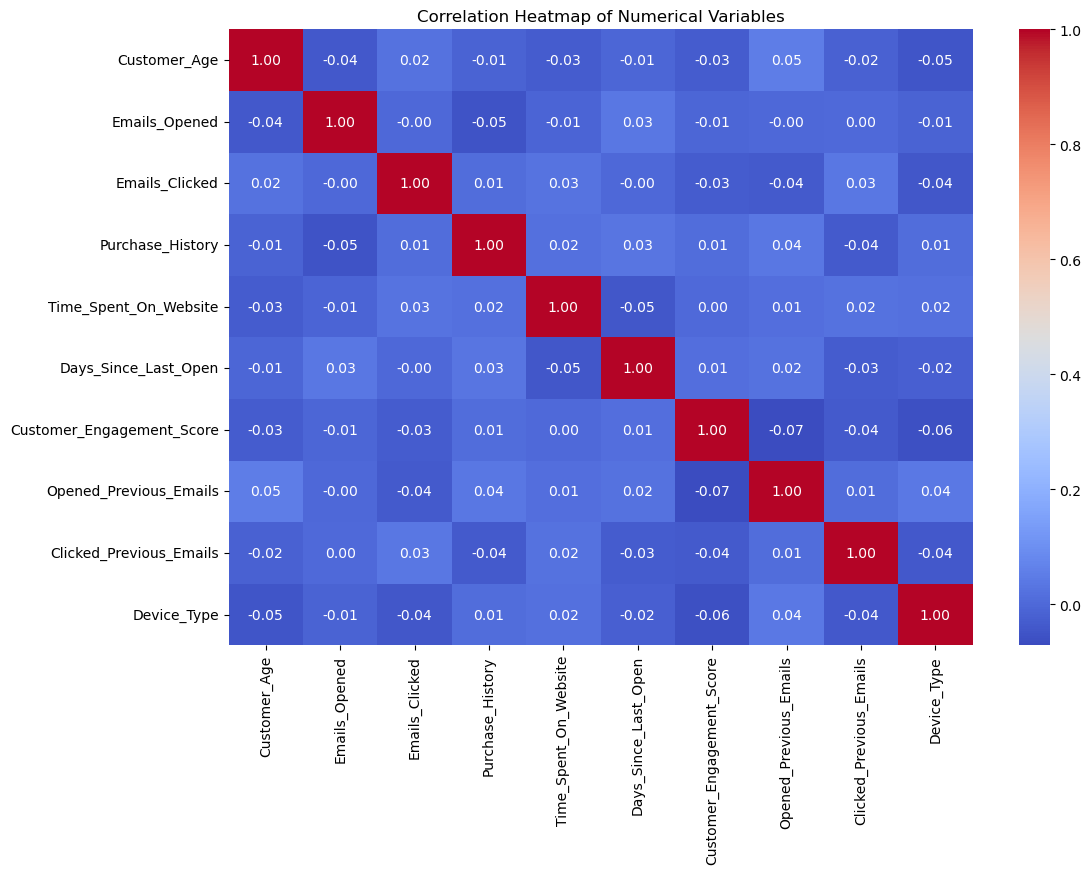

In [9]:
# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# There is a strong inverse correlation between opened previous emails and customer engagement score

# Boxplot Before Handling Outliers

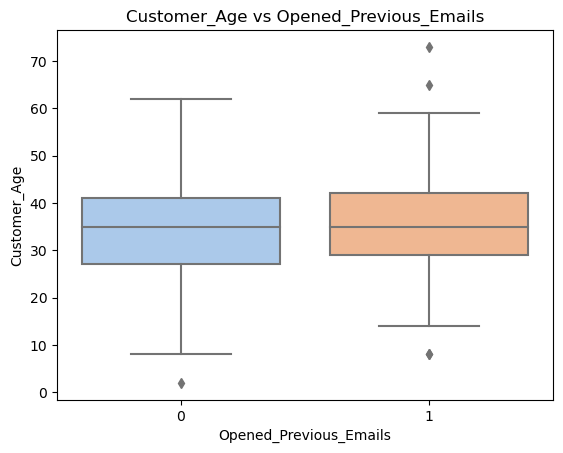

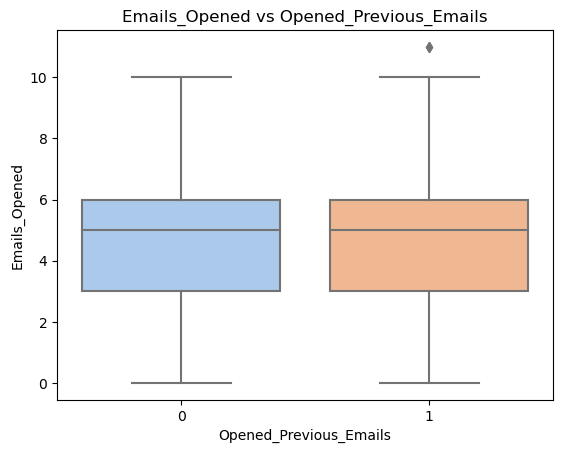

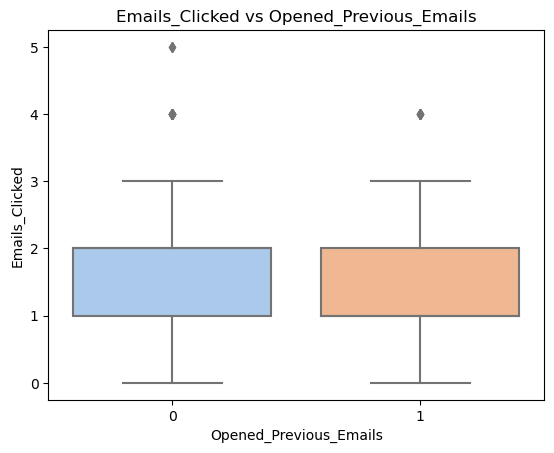

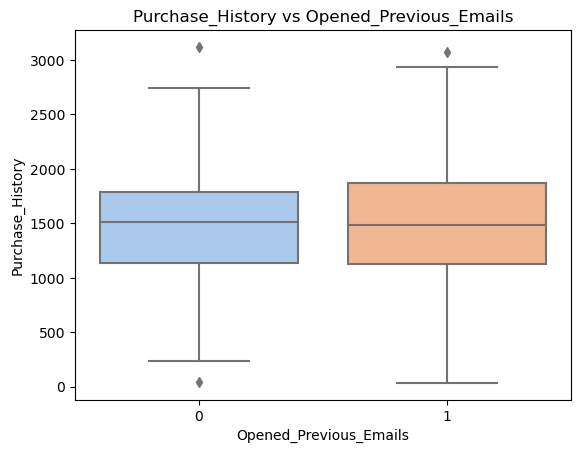

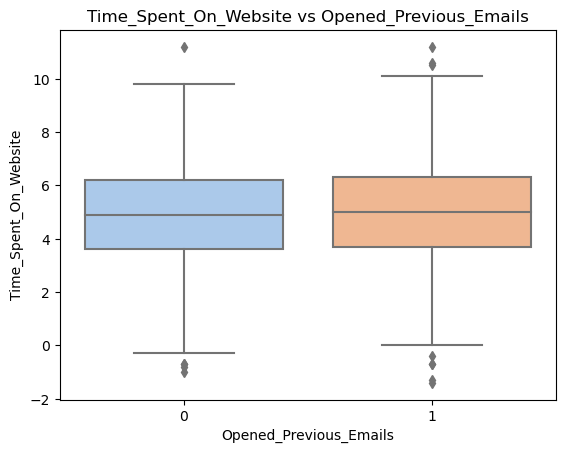

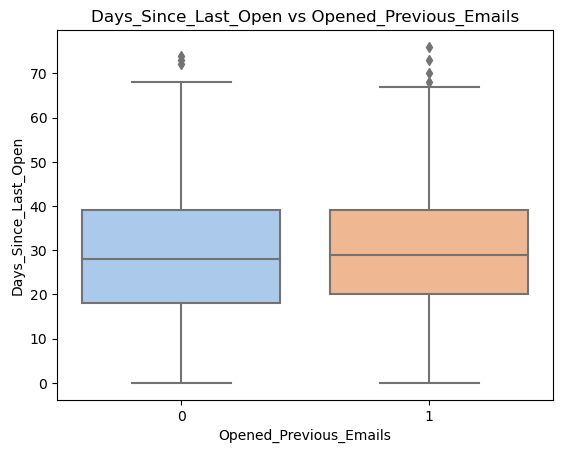

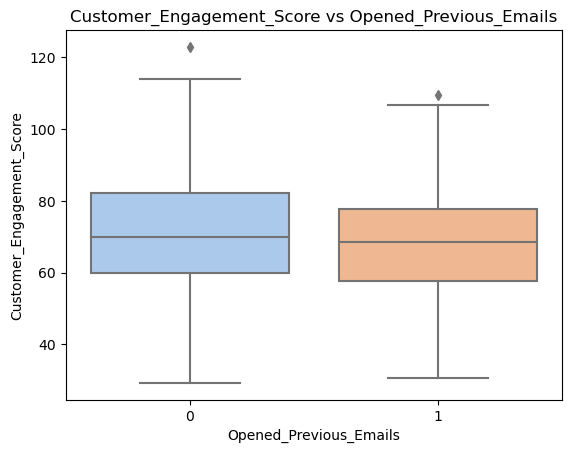

In [10]:
# Boxplots for numerical variables segmented by the target variable
numerical_vars = [
    'Customer_Age', 'Emails_Opened', 'Emails_Clicked',
    'Purchase_History', 'Time_Spent_On_Website',
    'Days_Since_Last_Open', 'Customer_Engagement_Score'
]

for var in numerical_vars:
    sns.boxplot(data, x='Opened_Previous_Emails', y=var, palette='pastel')
    plt.title(f"{var} vs Opened_Previous_Emails")
    plt.show()

# Handling Outliers

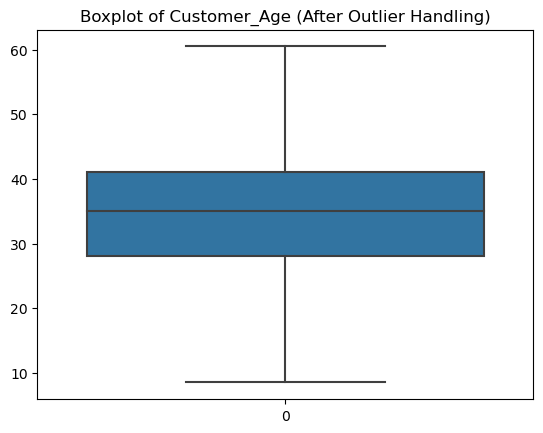

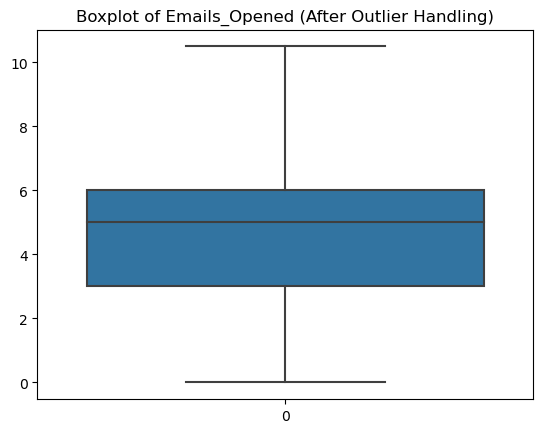

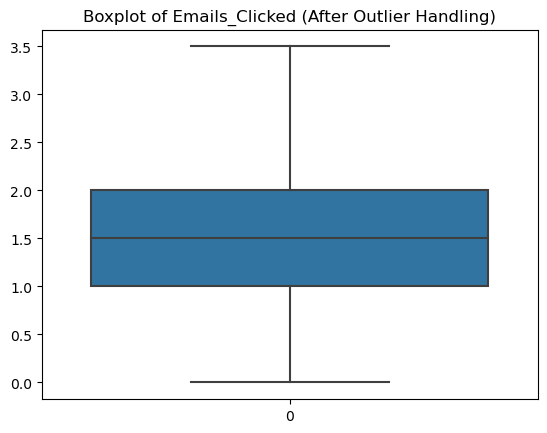

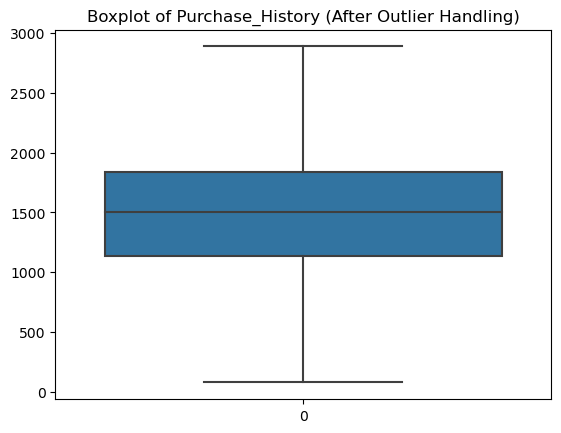

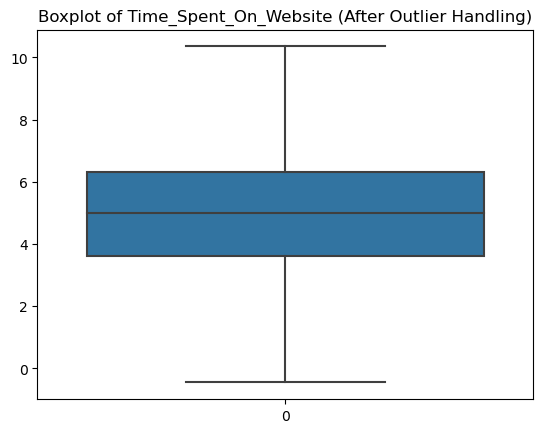

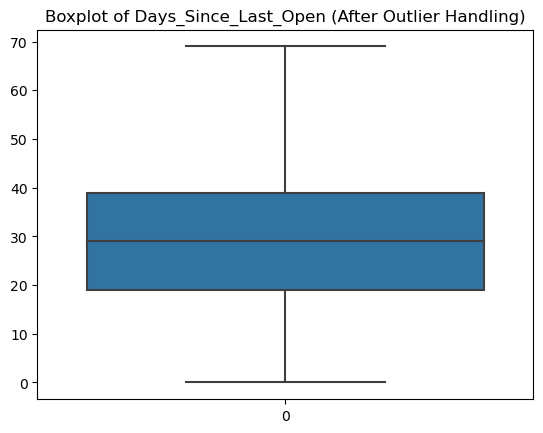

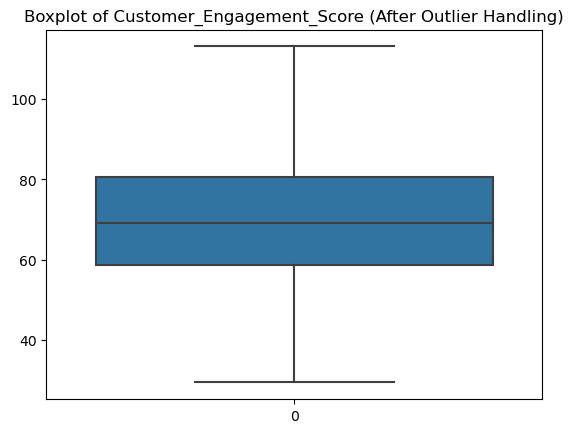

In [11]:
# Define a function to detect and cap outliers
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        
    return df

# List of numerical columns to check for outliers
numerical_columns = ["Customer_Age", "Emails_Opened", "Emails_Clicked", 
                     "Purchase_History", "Time_Spent_On_Website", 
                     "Days_Since_Last_Open", "Customer_Engagement_Score"]

# Handle outliers
data = handle_outliers(data, numerical_columns)

# Verify if outliers are capped
for col in numerical_columns:
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col} (After Outlier Handling)")
    plt.show()


In [12]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only rows within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

# Remove rows with outliers
data = remove_outliers(data, numerical_columns)

# Verify the number of rows after removal
print(f"Data shape after outlier removal: {data.shape}")


Data shape after outlier removal: (1000, 10)


# Boxplot After Handling Outliers

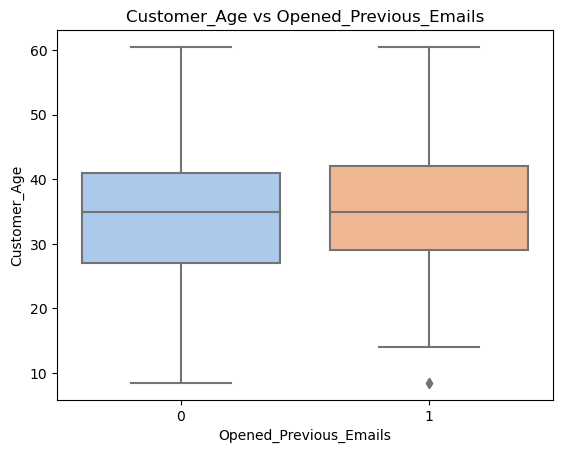

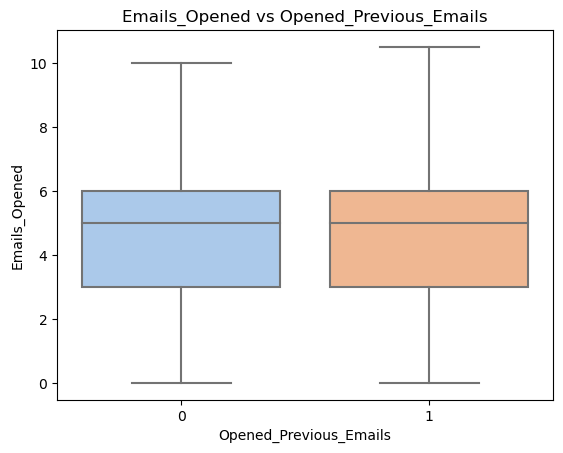

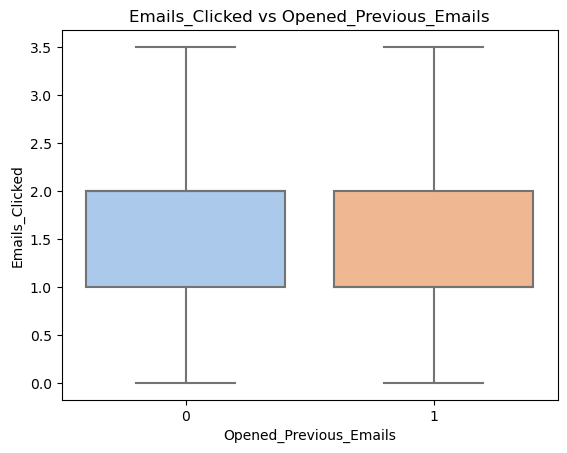

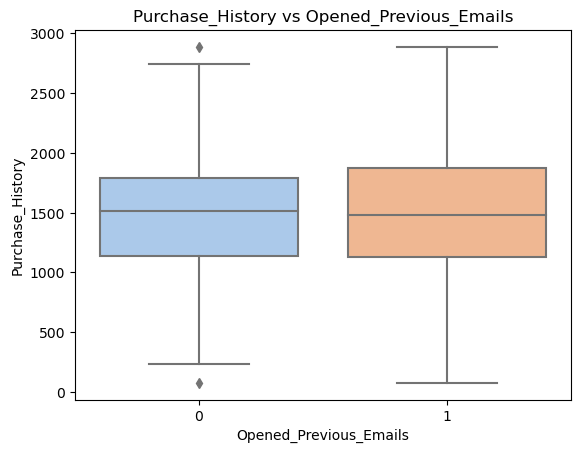

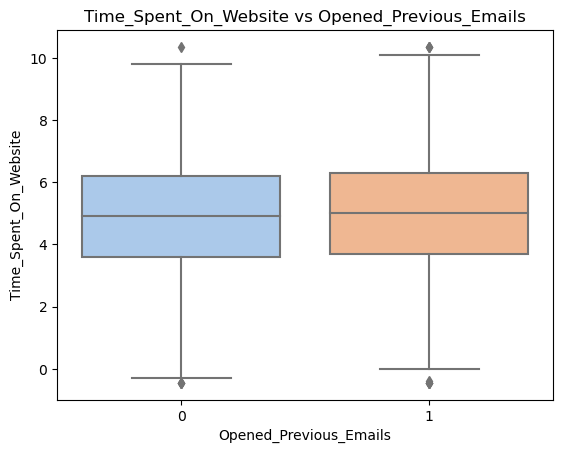

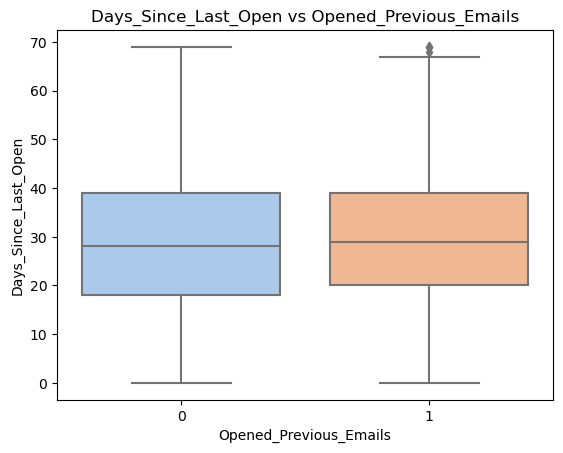

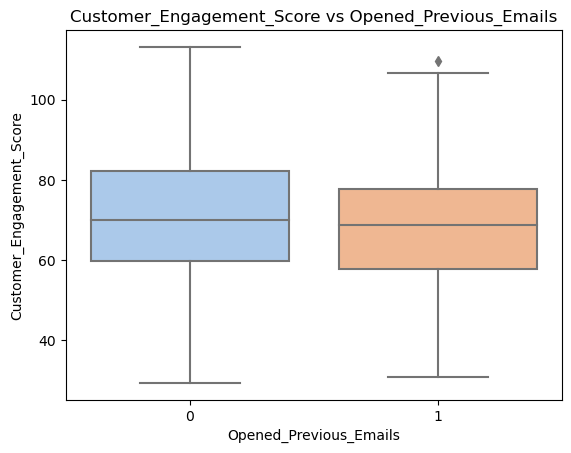

In [13]:
# Boxplots for numerical variables segmented by the target variable
numerical_vars = [
    'Customer_Age', 'Emails_Opened', 'Emails_Clicked',
    'Purchase_History', 'Time_Spent_On_Website',
    'Days_Since_Last_Open', 'Customer_Engagement_Score'
]

for var in numerical_vars:
    sns.boxplot(data, x='Opened_Previous_Emails', y=var, palette='pastel')
    plt.title(f"{var} vs Opened_Previous_Emails")
    plt.show()

# Standardizing Data 

In [14]:
# Separate features and target variable
X = data.drop(columns=["Opened_Previous_Emails"])
y = data["Opened_Previous_Emails"]


In [15]:
# Scale numerical variables
scaler = StandardScaler()
numerical_cols = ["Customer_Age", "Emails_Opened", "Emails_Clicked", "Purchase_History", 
                  "Time_Spent_On_Website", "Days_Since_Last_Open", "Customer_Engagement_Score"]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Model Building

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

# Model Evaluating 

In [17]:
# Function to train, predict, and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    if roc_auc != "N/A":
        print(f"ROC-AUC: {roc_auc:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Opened", "Opened"], yticklabels=["Not Opened", "Opened"])
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC curve (if applicable)
    if y_prob is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], "k--")
        plt.title(f"ROC Curve - {model.__class__.__name__}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()


# Logistic Regression Model

Model: LogisticRegression
Accuracy: 0.49
ROC-AUC: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.44      0.46        97
           1       0.51      0.54      0.53       103

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



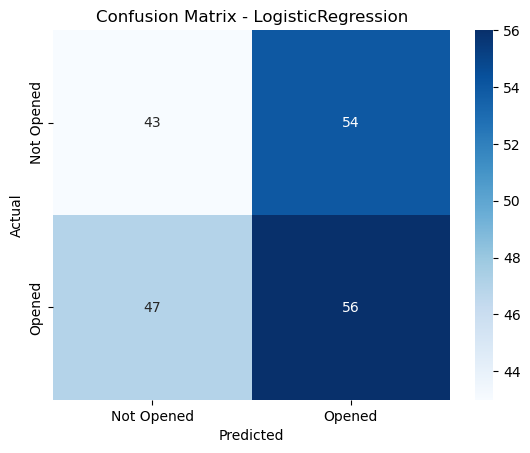

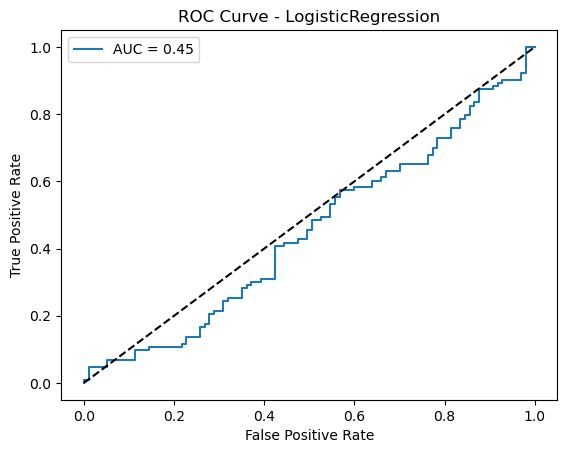

In [18]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
train_and_evaluate_model(logistic_model, X_train, y_train, X_test, y_test)


# SVM Model

Model: SVC
Accuracy: 0.52
ROC-AUC: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.45        97
           1       0.52      0.62      0.57       103

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200



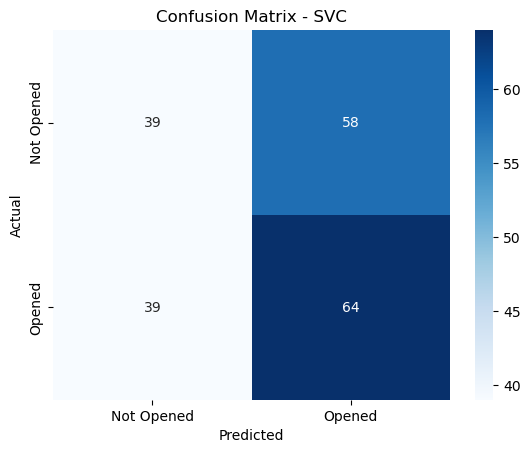

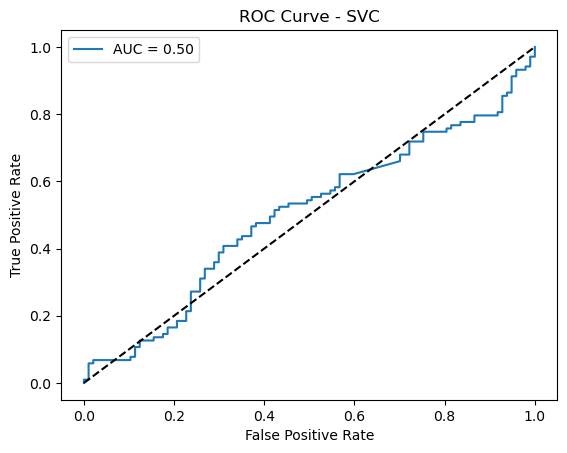

In [19]:
# Support Vector Machine
svm_model = SVC(probability=True, random_state=42)  # Enable probability for ROC-AUC
train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test)


# Gradient Boosting Model

Model: GradientBoostingClassifier
Accuracy: 0.50
ROC-AUC: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.41      0.44        97
           1       0.51      0.58      0.55       103

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.50       200



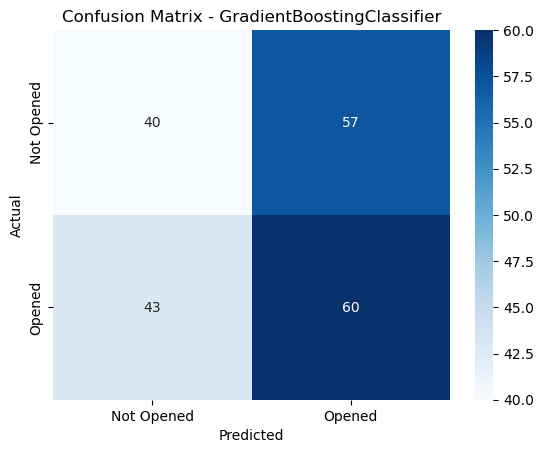

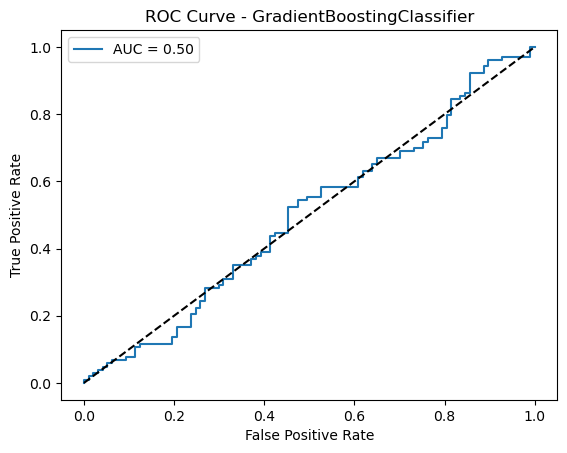

In [20]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
train_and_evaluate_model(gb_model, X_train, y_train, X_test, y_test)


# Random Forest Model

Model: RandomForestClassifier
Accuracy: 0.53
ROC-AUC: 0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49        97
           1       0.54      0.57      0.55       103

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200



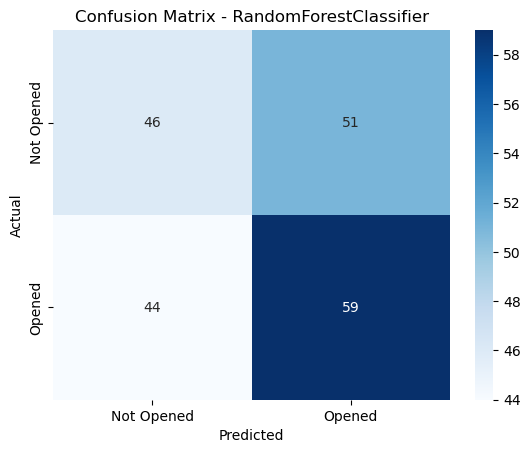

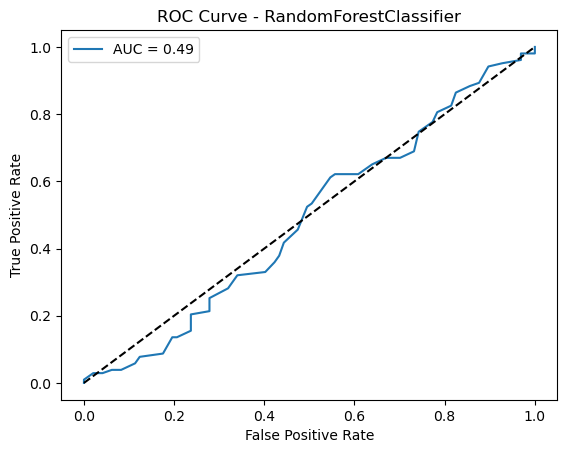

In [21]:
#Random Forest Classifier
Random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
train_and_evaluate_model(Random_forest_model, X_train, y_train, X_test, y_test)

# K-Nearest-Neighbors Model

Model: KNeighborsClassifier
Accuracy: 0.51
ROC-AUC: 0.52

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.44      0.46        97
           1       0.52      0.56      0.54       103

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



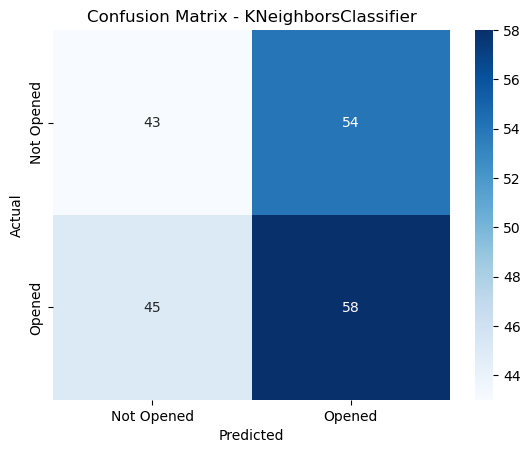

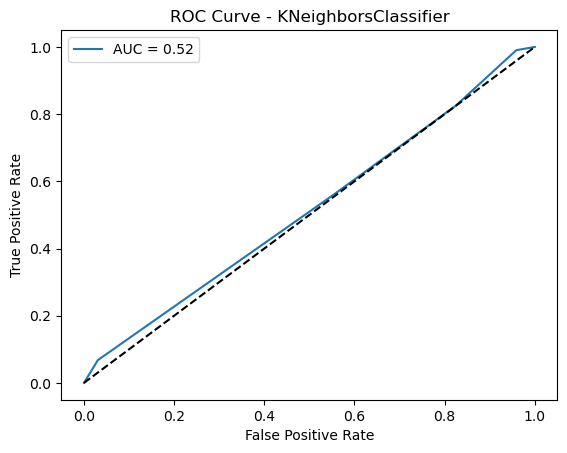

In [22]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(KNN_model,  X_train, y_train, X_test, y_test)

# Naive Bayes Model

Model: GaussianNB
Accuracy: 0.49
ROC-AUC: 0.46

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.41      0.44        97
           1       0.50      0.56      0.53       103

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



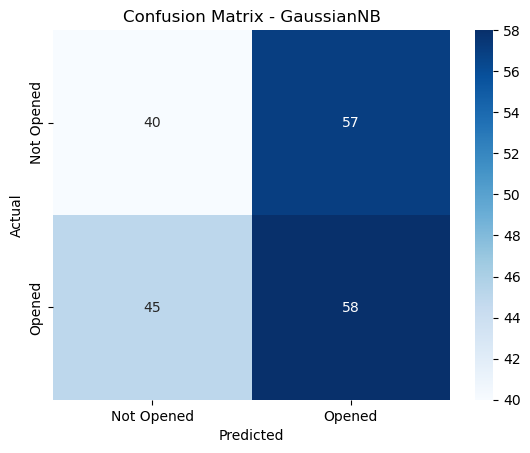

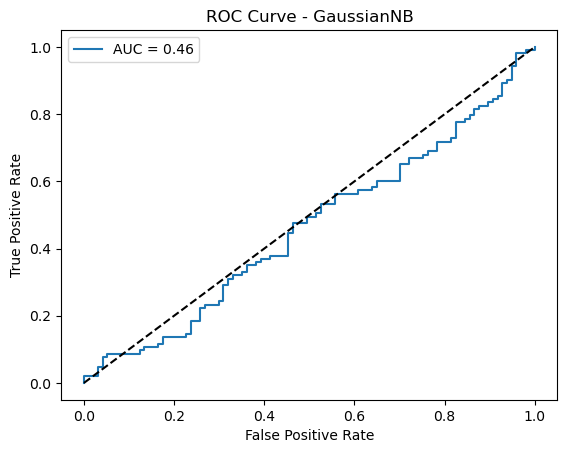

In [23]:
Naive_Bayes_Model = GaussianNB()
train_and_evaluate_model(Naive_Bayes_Model,  X_train, y_train, X_test, y_test)

# XGB Model

Model: XGBClassifier
Accuracy: 0.51
ROC-AUC: 0.47

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49        97
           1       0.52      0.53      0.53       103

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



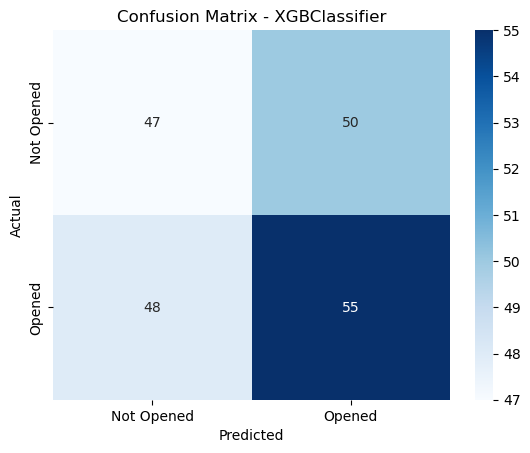

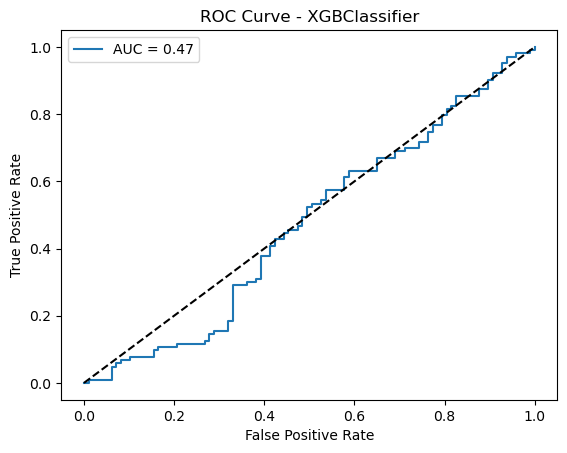

In [24]:
XGB_Model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
train_and_evaluate_model(XGB_Model,  X_train, y_train, X_test, y_test)

# LGB Model

[LightGBM] [Info] Number of positive: 410, number of negative: 390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512500 -> initscore=0.050010
[LightGBM] [Info] Start training from score 0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

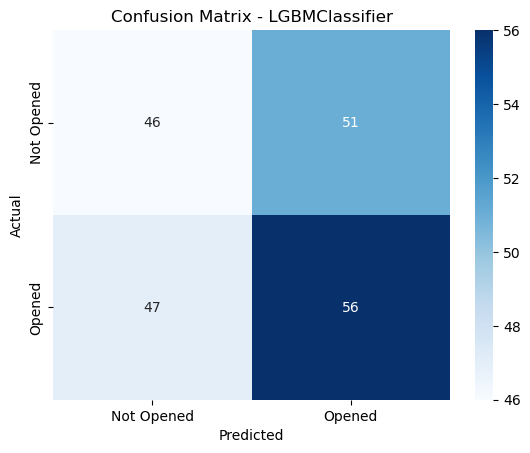

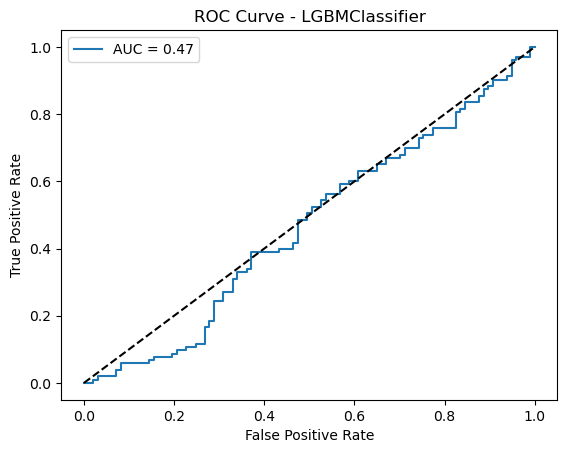

In [25]:
LGB_Model = lgb.LGBMClassifier(random_state=42)
train_and_evaluate_model(LGB_Model,  X_train, y_train, X_test, y_test)

# Comparison of  the Models

In [26]:
import warnings 
warnings.filterwarnings("ignore")

# Comparison of Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}


results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    results.append({"Model": name, "Accuracy": accuracy, "ROC-AUC": roc_auc})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by ="Accuracy", ascending = False)
results_df

[LightGBM] [Info] Number of positive: 410, number of negative: 390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 724
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512500 -> initscore=0.050010
[LightGBM] [Info] Start training from score 0.050010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,Model,Accuracy,ROC-AUC
3,Random Forest,0.525,0.487389
1,SVM,0.515,0.501752
6,XGBoost,0.510,0.470924
7,LightGBM,0.510,0.465919
4,K-Nearest Neighbors,0.505,0.515714
2,Gradient Boosting,0.500,0.498148
0,Logistic Regression,0.495,0.449404
5,Naive Bayes,0.490,0.461215


# Hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [28]:
# XGBoost parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


In [29]:
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, 
                              scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest Accuracy:", rf_grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Accuracy: 0.56375


In [30]:
# Initialize XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, 
                                       n_iter=50, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best XGBoost Parameters:", xgb_random_search.best_params_)
print("Best XGBoost Accuracy:", xgb_random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best XGBoost Accuracy: 0.5725


In [31]:
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")


Random Forest Test Accuracy: 0.54
Random Forest ROC-AUC: 0.52


In [32]:
best_xgb_model = xgb_random_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

print(f"XGBoost Test Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost ROC-AUC: {roc_auc_xgb:.2f}")


XGBoost Test Accuracy: 0.49
XGBoost ROC-AUC: 0.49


In [33]:
#pip install streamlit

In [34]:
# Save the best model
import pickle

with open("best_model.pkl", "wb") as model_file:
    pickle.dump(best_rf_model, model_file)  # Replace with your chosen model

# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)
